In [ ]:
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc
from IPython.display import HTML

In [ ]:
#Fungsi Lingkungan
def Lingkungan(Prey, Predator):
  Lingkungan = [[0 for j in range(50)] for i in range(50)]
  for i in range(len(Prey)):
    for j in range(50):
      for k in range(50):
        if (j,k) in Prey:
          Lingkungan[j][k] = 1 #Mengisi sel matriks dengan Prey (1)
  for i in range(len(Predator)):
    for j in range(50):
      for k in range(50):
        if (j,k) in Predator:
          Lingkungan[j][k] = 2 #Mengisi sel matriks dengan Predator (2)
  return Lingkungan

In [ ]:
#Fungsi Memperluas Matriks Lingkungan
def extension(Lingkungan):
  baris = len(Lingkungan)
  kolom = len(Lingkungan[0])
  Lingkungan_ext = [[0 for i in range(kolom+2)] for i in range(baris+2)]
  for i in range(1, baris+1):
    for j in range(1, kolom+1):
      Lingkungan_ext[i][j] = Lingkungan[i-1][j-1] #Mengisi entri matriks lingkungan yang sudah diperluas dengan entri matriks sebelum diperluas
  return Lingkungan_ext

In [ ]:
#Fungsi Ghost Cell
#Digunakan Absorbing Boundary Condition
def absorbing(Lingkungan_ext, nilai):

  baris = len(Lingkungan_ext)
  kolom = len(Lingkungan_ext[0])
  for j in range(1, kolom-1):
    Lingkungan_ext[0][j] = nilai
    Lingkungan_ext[baris-1][j] = nilai
  for i in range(0, baris):
    Lingkungan_ext[i][0] = nilai
    Lingkungan_ext[i][kolom-1] = nilai
  return Lingkungan_ext

In [ ]:
#Fungsi Mengecek apakah predator bisa memakan prey atau tidak
def pick(i, j, N, E, S, W, NE, SE, NW, SW):
  neighbor_list = [N, E, S, W, NE, SE, NW, SW]
  pos_prey_list = [i for i in range(len(neighbor_list)) if neighbor_list[i] == 1] #Array posisi jika tetangganya adalah Prey
  pos_predator_list = [i for i in range(len(neighbor_list)) if neighbor_list[i] == 2] #Array posisi jika tetangganya adalah Predator

  if pos_prey_list == []:                           #Kondisi jika tidak ada prey di sekitarnya
    return i, j                                     #Mengembalikan indeks posisi awal predator, artinya tidak pindah untuk makan
  else:
    r = np.random.randint(0, len(pos_prey_list))
    if pos_prey_list[r] == 0:                       #Kondisi jika prey berada di utara
      if pos_predator_list == []:                   #Kondisi jika tidak ada predator yang lain akan memakan prey tersebut
        return i-1, j                               #Karena predator akan makan, maka indeks posisinya sama dengan posisi prey
      else:                                         #Kondisi jika ada predator lain yang akan memakan prey tersebut
        w = np.random.randint(1,3)
        if w == 1:                                  #Random, didefinisikan jika angka yang keluar adalah 1, maka predator tersebut yang akan makan
          return i-1, j
        else:                                       #Didefinisikan jika angka yang keluar adalah 2, maka predator tetangga yang akan makan prey tersebut
          return i, j                               #Posisi predator tidak berubah karena tidak makan prey tersebut
    elif pos_prey_list[r] == 1:                     #Kondisi jika prey berada di timur
      if pos_predator_list == []:                   #Kondisi jika tidak ada predator yang lain akan memakan prey tersebut
        return i, j+1                               #Karena predator akan makan, maka indeks posisinya sama dengan posisi prey
      else:
        w = np.random.randint(1,3)
        if w == 1:                                  #Random, didefinisikan jika angka yang keluar adalah 1, maka predator tersebut yang akan makan
          return i, j+1
        else:                                       #Didefinisikan jika angka yang keluar adalah 2, maka predator tetangga yang akan makan prey tersebut
          return i, j                               #Posisi predator tidak berubah karena tidak makan prey tersebut
    elif pos_prey_list[r] == 2:                     #Kondisi jika prey berada di selatan
      if pos_predator_list == []:                   #Kondisi jika tidak ada predator yang lain akan memakan prey tersebut
        return i+1, j
      else:
        w = np.random.randint(1,3)
        if w == 1:                                  #Random, didefinisikan jika angka yang keluar adalah 1, maka predator tersebut yang akan makan
          return i+1, j
        else:                                       #Didefinisikan jika angka yang keluar adalah 2, maka predator tetangga yang akan makan prey tersebut
          return i, j                               #Posisi predator tidak berubah karena tidak makan prey tersebut
    elif pos_prey_list[r] == 3:                     #Kondisi jika prey berada di barat
      if pos_predator_list == []:                   #Kondisi jika tidak ada predator yang lain akan memakan prey tersebut
        return i, j-1                               #Karena predator akan makan, maka indeks posisinya sama dengan posisi prey
      else:
        w = np.random.randint(1,3)
        if w == 1:                                  #Random, didefinisikan jika angka yang keluar adalah 1, maka predator tersebut yang akan makan
          return i, j-1
        else:                                       #Didefinisikan jika angka yang keluar adalah 2, maka predator tetangga yang akan makan prey tersebut
          return i, j                               #Posisi predator tidak berubah karena tidak makan prey tersebut
    elif pos_prey_list[r] == 4:                     #Kondisi jika prey berada di north east
      if pos_predator_list == []:                   #Kondisi jika tidak ada predator yang lain akan memakan prey tersebut
        return i-1, j+1
      else:
        w = np.random.randint(1,3)                  #Random, didefinisikan jika angka yang keluar adalah 1, maka predator tersebut yang akan makan
        if w == 1:
          return i-1, j+1
        else:                                       #Didefinisikan jika angka yang keluar adalah 2, maka predator tetangga yang akan makan prey tersebut
          return i, j                               #Posisi predator tidak berubah karena tidak makan prey tersebut
    elif pos_prey_list[r] == 5:                     #Kondisi jika prey berada di south east
      if pos_predator_list == []:                   #Kondisi jika tidak ada predator yang lain akan memakan prey tersebut
        return i+1, j+1
      else:
        w = np.random.randint(1,3)                  #Random, didefinisikan jika angka yang keluar adalah 1, maka predator tersebut yang akan makan
        if w == 1:
          return i+1, j+1
        else:                                       #Didefinisikan jika angka yang keluar adalah 2, maka predator tetangga yang akan makan prey tersebut
          return i,j                                #Posisi predator tidak berubah karena tidak makan prey tersebut
    elif pos_prey_list[r] == 6:                     #Kondisi jika prey berada di northwest
      if pos_predator_list == []:                   #Kondisi jika tidak ada predator yang lain akan memakan prey tersebut
        return i-1, j-1
      else:
        w = np.random.randint(1,3)
        if w == 1:                                  #Random, didefinisikan jika angka yang keluar adalah 1, maka predator tersebut yang akan makan
          return i-1, j-1
        else:                                       #Didefinisikan jika angka yang keluar adalah 2, maka predator tetangga yang akan makan prey tersebut
          return i,j                                #Posisi predator tidak berubah karena tidak makan prey tersebut
    else:                                           #Kondisi jika prey berada di southwest
      if pos_predator_list == []:                   #Kondisi jika tidak ada predator yang lain akan memakan prey tersebut
        return i+1, j-1
      else:
        w = np.random.randint(1,3)
        if w == 1:                                  #Random, didefinisikan jika angka yang keluar adalah 1, maka predator tersebut yang akan makan
          return i+1, j-1
        else:                                       #Didefinisikan jika angka yang keluar adalah 2, maka predator tetangga yang akan makan prey tersebut
          return i,j                                #Posisi predator tidak berubah karena tidak makan prey tersebut

In [ ]:
#Fungsi Makan
def makan(Lingkungan_ext):
  row = len(Lingkungan_ext)
  col = len(Lingkungan_ext[0])
  Lingkungan_new = [[j for j in Lingkungan_ext[i]] for i in range(row)]
  for i in range(1,row-1):
    for j in range(1,col-1):
      if Lingkungan_ext[i][j] == 2:                 #Hanya di looping untuk kondisi jika sel tersebut adalah predator
        N = Lingkungan_ext[i-1][j]
        E = Lingkungan_ext[i][j+1]
        S = Lingkungan_ext[i+1][j]
        W = Lingkungan_ext[i][j-1]
        NE = Lingkungan_ext[i-1][j+1]
        SE = Lingkungan_ext[i+1][j+1]
        NW = Lingkungan_ext[i-1][j-1]
        SW = Lingkungan_ext[i+1][j-1]
        i_new, j_new = pick(i,j, N, E, S, W, NE, SE, NW, SW)    #memanggil fungsi pick untuk mengeluarkan indeks posisi predator jika akan makan
        if last_eat[i][j] <1 :                 #last_eat < 1 artinya predator makan di iterasi sebelumnya
          Lingkungan_new[i_new][j_new] = 1     #jika iterasi sebelumnya sudah makan makan iterasi sekarang tidak makan meskipun di tetangganya terdapat Prey
          Lingkungan_new[i][j] = 2             #Predator tetap berada di tempatnya karena tidak makan
          last_eat[i][j]+=1                    #last_eat bertambah 1 karena pada iterasi sekarang tidak makan
        else :                                 #jika last eat>= 1 maka predator sudah bisa makan kembali
          Lingkungan_new[i_new][j_new] = 2     #predator bergerak ke sel tetangga yang terdapat Prey
          Lingkungan_new[i][j] = 0             #karena predator sudah berpindah maka di posisi predator sebelumnya berubah menjadi kosong
          last_eat[i_new][j_new] = 0           #pada iterasi sekarang predator makan sehingga last_eat kembali menjadi 0
          last_eat[i][j] = 0                   #last_eat posisi lama predator juga berubah ke-0 karena sudah tidak ada predator di sel tersebut
        if i_new == i and j_new == j:          #artinya predator tidak bergerak
          last_eat[i_new][j_new] +=1           #jika tidak bergerak makan predator juga tidak makan sehingga nilai last_eat bertambah 1
  return Lingkungan_new

In [ ]:
#Fungsi sensing apakah terdapat sel di sekitarnya yang bisa dilalui
def sensing(i, j, site, N, E, S, W):
  site = False
  N = True #di awal diberi nilai True menandakan dapat dilewatkan
  E = True
  S = True
  W = True
  while (site == False): #site = False artinya belum mendapatkan tempat untuk pindah sehingga harus mencari lagi tetangga yang dapat dilalui
    if (N == True or E == True or W == True or S == True) : #jika ada yg bernilai True artinya masih ada kemungkinan untuk bisa pindah ke tetangga
      rand_direct = np.random.random()
      if (rand_direct<0.25) :                                             #Jika sebelah utara dapat dilalui
        if Lingkungan_ext[i-1][j] == 2 or Lingkungan_ext[i-1][j] == 1 :   #Jika di sebelah utara ada prey atau predator, maka tidak bisa dilewatkan
          N = False
        else :
          site = True                                                     #Kondisi jika tidak ada individu lain di sebelah utara, sehingga individu dapat pindah ke utara
          return i-1, j
      elif (rand_direct<0.5) :                                            #Jika sebelah timur dapat dilalui
        if Lingkungan_ext[i][j+1] == 2 or Lingkungan_ext[i][j+1] == 1 :   #Jika di sebelah timur ada prey atau predator, maka tidak bisa dilewatkan
          E = False
        else :                                                            #Kondisi jika tidak ada individu lain di sebelah utara, sehingga individu dapat pindah ke utara
          site = True
          return i, j+1
      elif (rand_direct<0.75) :                                           #Jika sebelah selatan dapat dilalui
        if Lingkungan_ext[i+1][j] == 2 or Lingkungan_ext[i+1][j] == 1 :   #Jika di sebelah timur ada prey atau predator, maka tidak bisa dilewatkan
          S = False
        else :                                                            #Kondisi jika tidak ada individu lain di sebelah utara, sehingga individu dapat pindah ke utara
          site = True
          return i+1, j
      else :                                                              #Jika di sebelah barat dapat dilalui
        if Lingkungan_ext[i][j-1] == 2 or Lingkungan_ext[i][j-1] == 1 :   #Jika di sebelah barat ada prey atau predator, maka tidak bisa dilewatkan
          W = False
        else:
          site = True                                                     #Kondisi jika tidak ada individu lain di sebelah barat, sehingga individu dapat pindah ke barat
          return i, j-1
    else:                                                                 #Kondisi jika tidak ada kemungkinan untuk pindah, maka tetap di posisi awal
      return i,j

In [ ]:
#Fungsi Jalan untuk Individu
def movement(Lingkungan_ext):
  row = len(Lingkungan_ext)
  col = len(Lingkungan_ext[0])
  Lingkungan_new = [[j for j in Lingkungan_ext[i]] for i in range(row)]
  for i in range(1,row-1):
    for j in range(1,col-1):
      site = Lingkungan_ext[i][j]
      N = Lingkungan_ext[i-1][j]
      E = Lingkungan_ext[i][j+1]
      S = Lingkungan_ext[i+1][j]
      W = Lingkungan_ext[i][j-1]
      if Lingkungan_ext[i][j] != 0:
        if Lingkungan_ext[i][j] == 1:                       #jika di sel tersebut terdapat Prey
          i_new, j_new = sensing(i, j, site, N, E, S, W)    #mencari sel tetangga untuk berpindah tempat
          Lingkungan_new[i_new][j_new] = 1                  #Prey berpindah tempat
          Lingkungan_new[i][j] = 0                          #posisi Prey sebelumnya menjadi kosong
        elif Lingkungan_ext[i][j] == 2:                     #jika di sel tersebut terdapat Predator
          i_new, j_new = sensing(i,j,site,N, E, S, W)       #mencari sel tetangga untuk berpindah tempat
          Lingkungan_new[i_new][j_new] = 2                  #Predator berpindah tempat
          Lingkungan_new[i][j] = 0                          #posisi Predator sebelumnya menjadi kosong
          last_eat[i_new][j_new] = last_eat[i][j]           #memperbarui indeks last eat sesuai dengan posisi predator yag terbaru
          last_eat[i][j] = 0                                #karena predator sudah berpindah tempat maka last eat posisi sebelumnya menjadi kosong
  return Lingkungan_new

In [ ]:
#Fungsi untuk mengecek apakah ada predator yang tidak makan selama (3+(76%3)) timestep
def check(Lingkungan_ext):
  row = len(Lingkungan_ext)
  col = len(Lingkungan_ext[0])

  for i in range(1, row-1):
    for j in range(1, col-1):
      if Lingkungan_ext[i][j] == 2 and last_eat[i][j] == 3+(76%3): #Kondisi jika predator tidak makan selama (3+(76%3)) timestep
        Lingkungan_ext[i][j] = 0 #predator mati
  return Lingkungan_ext

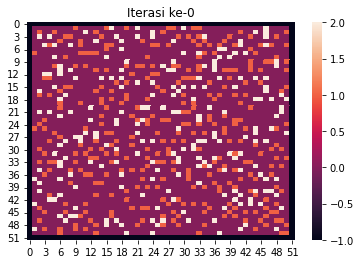

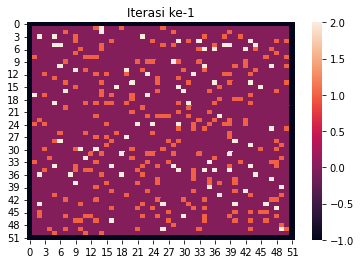

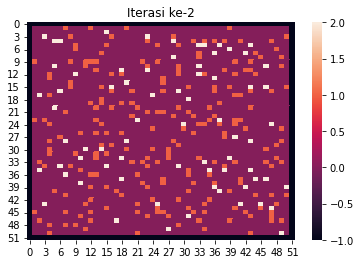

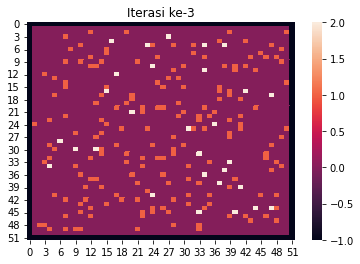

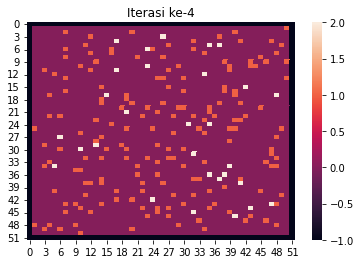

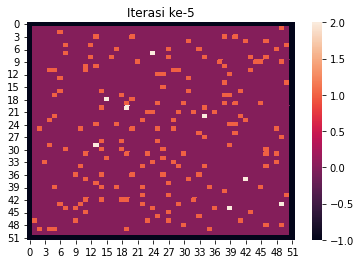

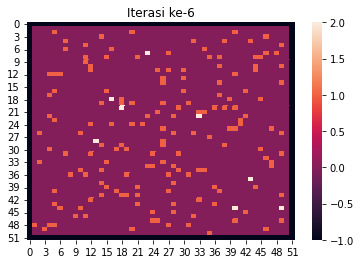

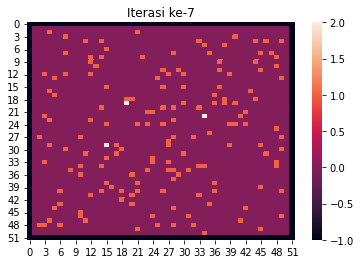

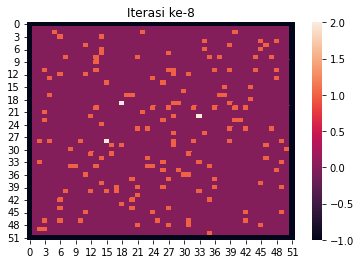

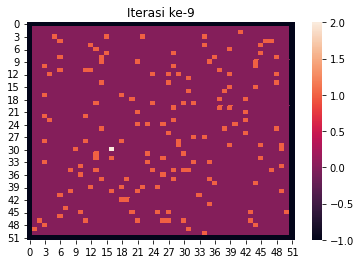

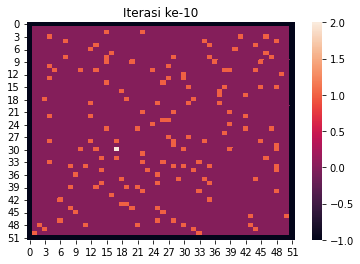

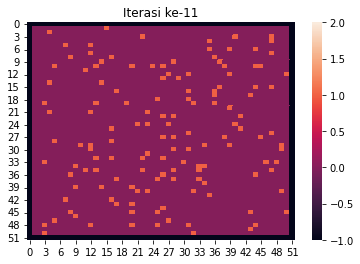

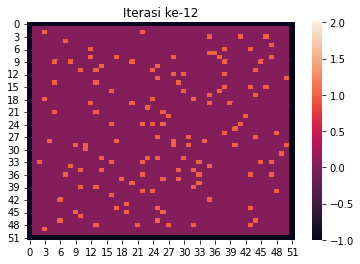

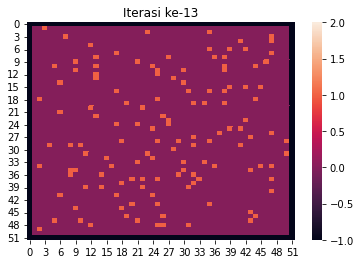

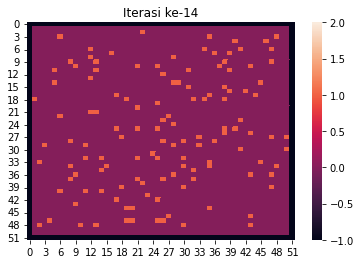

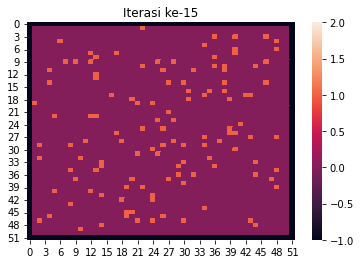

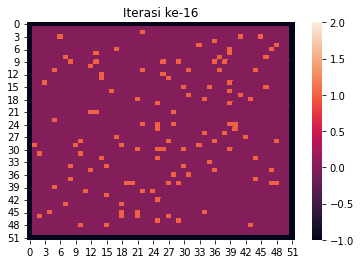

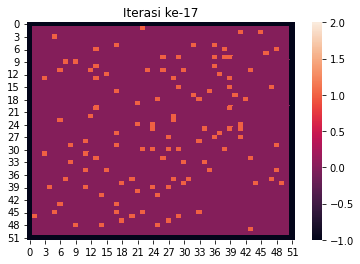

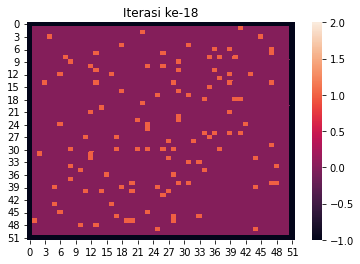

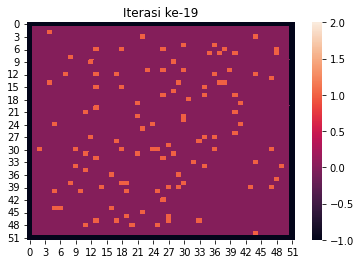

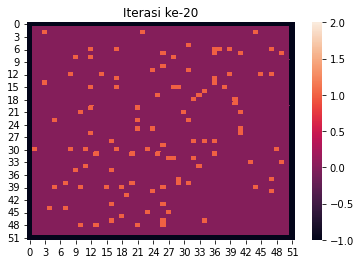

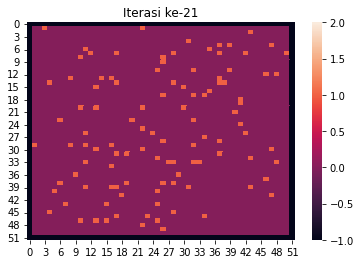

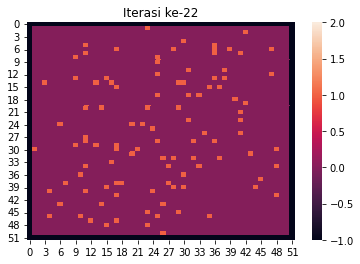

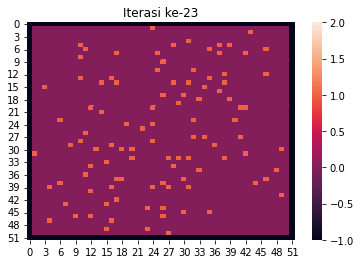

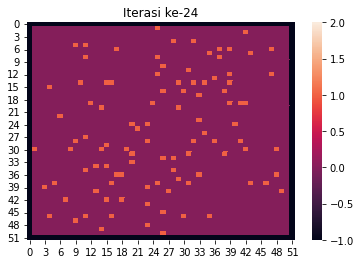

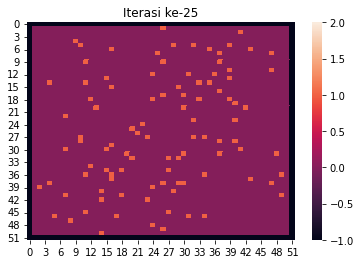

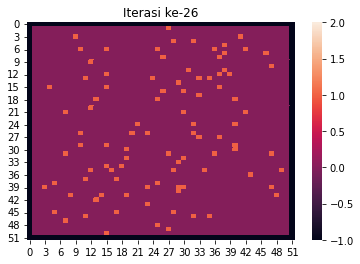

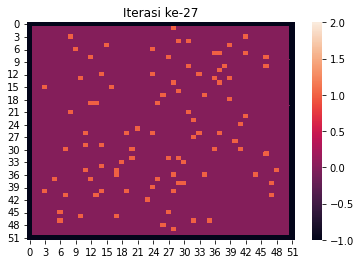

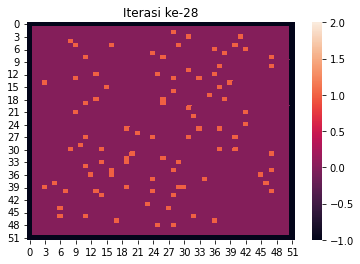

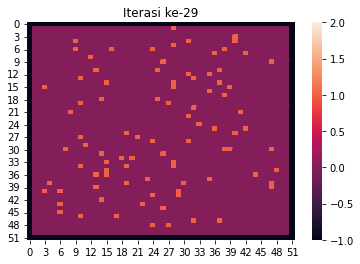

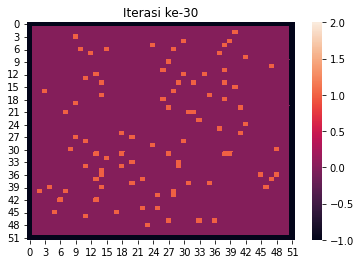

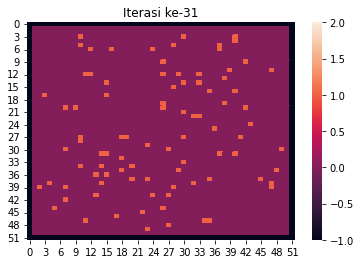

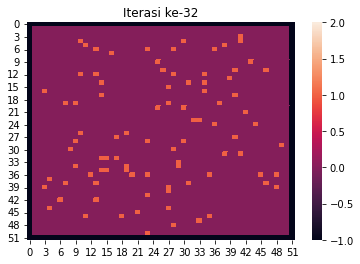

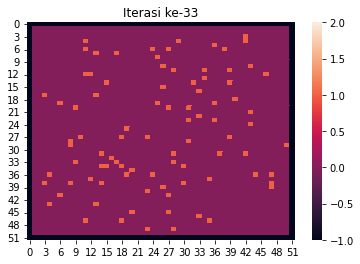

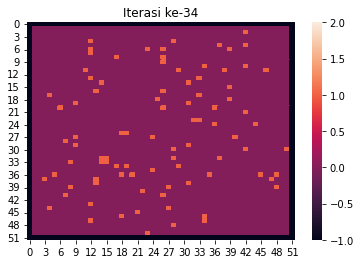

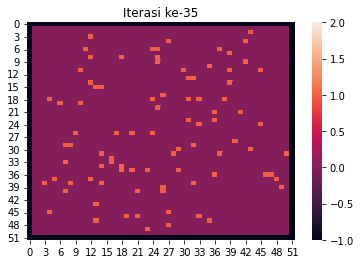

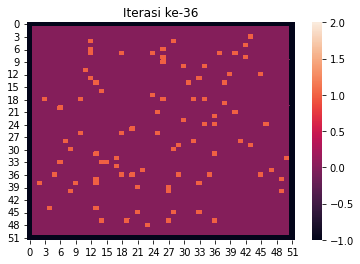

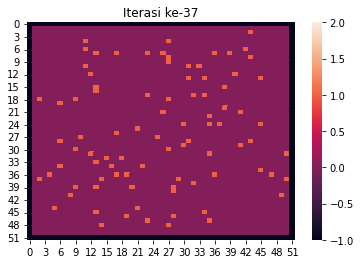

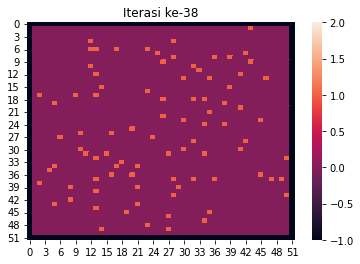

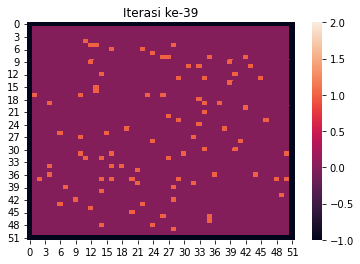

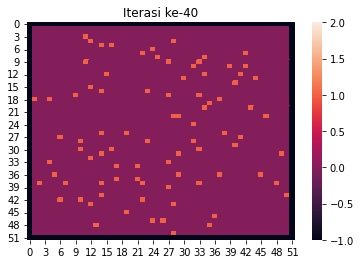

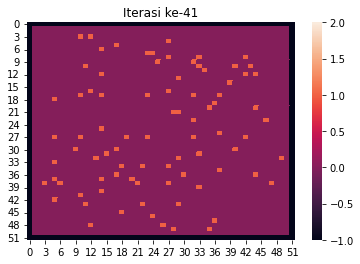

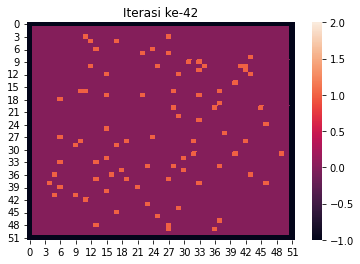

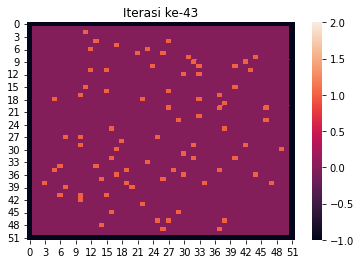

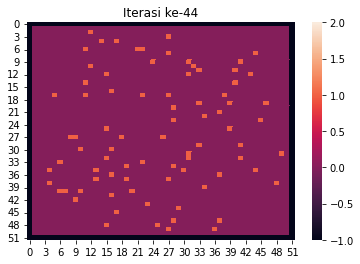

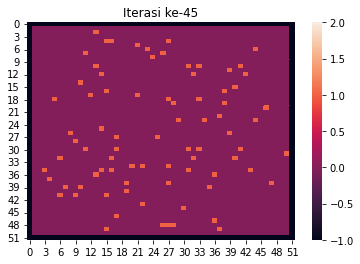

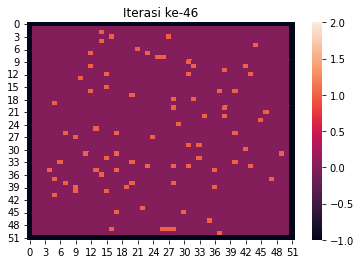

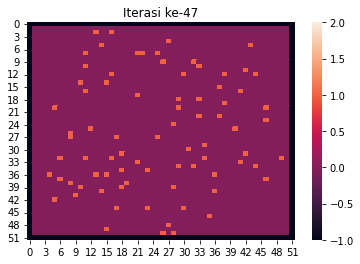

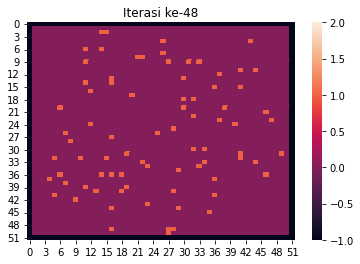

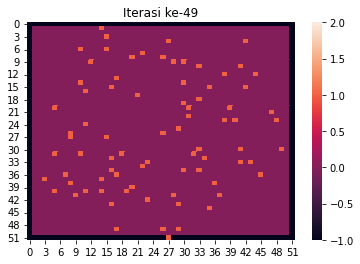

In [ ]:
#Algoritma Utama
import numpy as np
#Posisi Prey dan Predator secara random
Prey = []
Predator = []
i=0
r = np.random.randint(1,3)
x = np.random.randint(0,50)
y= np.random.randint(0,50)
if r == 1:
  Prey.append((x,y))
else:
  Predator.append((x,y))
while i<2500:
  rand = np.random.random()
  x_new = np.random.randint(0,50)
  y_new = np.random.randint(0,50)
  if rand< 0.15:                        #Terdapat prey
    if x_new != x and y_new != y:
      Prey.append((x_new,y_new))
      x = x_new
      y = y_new
    else:
      i = i + 1
  elif rand <0.24:                       #Terdapat predator
    if x_new != x and y_new != y:
      Predator.append((x_new,y_new))
      x = x_new
      y = y_new
    else:
      i = i + 1
  else:
    i = i + 1
#Konstanta
nilai = -1                             #Nilai ghost cell
n = 50                                  #banyak iterasi
Lingkungan = Lingkungan(Prey, Predator) #Mengisi lingkungan dengan matriks
Lingkungan_ext = extension(Lingkungan)  #perluas matriks
Lingkungan_list = []
last_eat = [[0 for j in range(52)] for i in range(52)] #array untuk menyimpan nilai kapan predator pada posisi i,j terakhir kali makan
for t in range(n):
  Lingkungan_ext = absorbing(Lingkungan_ext, nilai) #Memanggil fungsi batas
  Lingkungan_ext = makan(Lingkungan_ext)            #Memanggil fungsi makan
  Lingkungan_ext = movement(Lingkungan_ext)         #Memanggil fungsi gerak
  Lingkungan_ext = check(Lingkungan_ext)            #Mengecek apakah ada predator yang tidak makan selama (3+76%3) time step
  Lingkungan_list.append(Lingkungan_ext)
#Kondisi Lingkungan Tiap Iterasi
for i in range(len(Lingkungan_list)):
  ax = sns.heatmap(data=Lingkungan_list[i], vmin = -1, vmax = 2)
  plt.title("Iterasi ke-"+str(i))
  plt.show()

In [ ]:
#Animasi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import random
def init():
  plt.clf()
  return None
def animate(i):
  plt.clf()
  ax = sns.heatmap(Lingkungan_list[i], vmin =-1, vmax=2)
  return None
fig = plt.figure()
anim = animation.FuncAnimation(fig, animate, frames=range(1, len(Lingkungan_list),1), interval=200, init_func=init)
from matplotlib import rc
from IPython.display import HTML
rc("animation", html="jshtml")
anim

<Figure size 432x288 with 0 Axes>